In [11]:
from models import *
from utils import *
import torch
import torchvision
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)

%reload_ext autoreload
%autoreload 2

betas = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0, 4.0]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
def test_beta_vae(beta, shape, train_loader, val_loader, weights_dir, history_dir):
    model_name = f'β-VAE_{beta:.2}'

    model = VariadicAE(shape, 64, [512]).to(device)
    model.output_mean_std = True

    opt = torch.optim.Adam(model.parameters())
    loss_fn = BetaKLDivLoss(beta)

    history = train(model, device, train_loader, val_loader, opt, loss_fn, 50, model_name, weights_dir, 5, 0.05)
    history.to_csv(os.path.join(history_dir, f'{model_name}.history.csv'))

model_names = [f'β-VAE_{beta:.2}' for beta in betas]


In [13]:
mnist_train_data = torchvision.datasets.MNIST(root='../datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_test_data = torchvision.datasets.MNIST(root='../datasets', train=False, download=True, transform=torchvision.transforms.ToTensor())

mnist_train_loader = torch.utils.data.DataLoader(mnist_train_data, batch_size=64, shuffle=True, pin_memory=True)
mnist_val_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=64, shuffle=True, pin_memory=True)
mnist_weights_dir = 'weights/MNIST'
mnist_history_dir = 'histories/MNIST'

os.makedirs(mnist_weights_dir, exist_ok=True)
os.makedirs(mnist_history_dir, exist_ok=True)
mnist_shape = (1, 28, 28)

for b in betas:
    test_beta_vae(b, mnist_shape, mnist_train_loader, mnist_val_loader, mnist_weights_dir, mnist_history_dir)


Epoch 1: Train loss: 20.971821, Validation loss: 9.89452703704834
Epoch 2: Train loss: 8.323691, Validation loss: 6.7560537307739255
Epoch 3: Train loss: 6.249766, Validation loss: 5.597709803771973
Epoch 4: Train loss: 5.290554, Validation loss: 4.968533650970459
Epoch 5: Train loss: 4.690992, Validation loss: 4.409297702026367
Epoch 6: Train loss: 4.254209, Validation loss: 4.094206522369385
Epoch 7: Train loss: 3.940478, Validation loss: 3.85875881729126
Epoch 8: Train loss: 3.694156, Validation loss: 3.5665910316467286
Epoch 9: Train loss: 3.511302, Validation loss: 3.447437942123413
Epoch 10: Train loss: 3.350674, Validation loss: 3.2919095584869384
Epoch 11: Train loss: 3.241142, Validation loss: 3.2291299423217774
Epoch 12: Train loss: 3.133548, Validation loss: 3.2003443313598634
Epoch 13: Train loss: 3.042703, Validation loss: 3.0981965324401854
Epoch 14: Train loss: 2.977292, Validation loss: 3.0044103580474855
Epoch 15: Train loss: 2.907945, Validation loss: 2.97694988479614

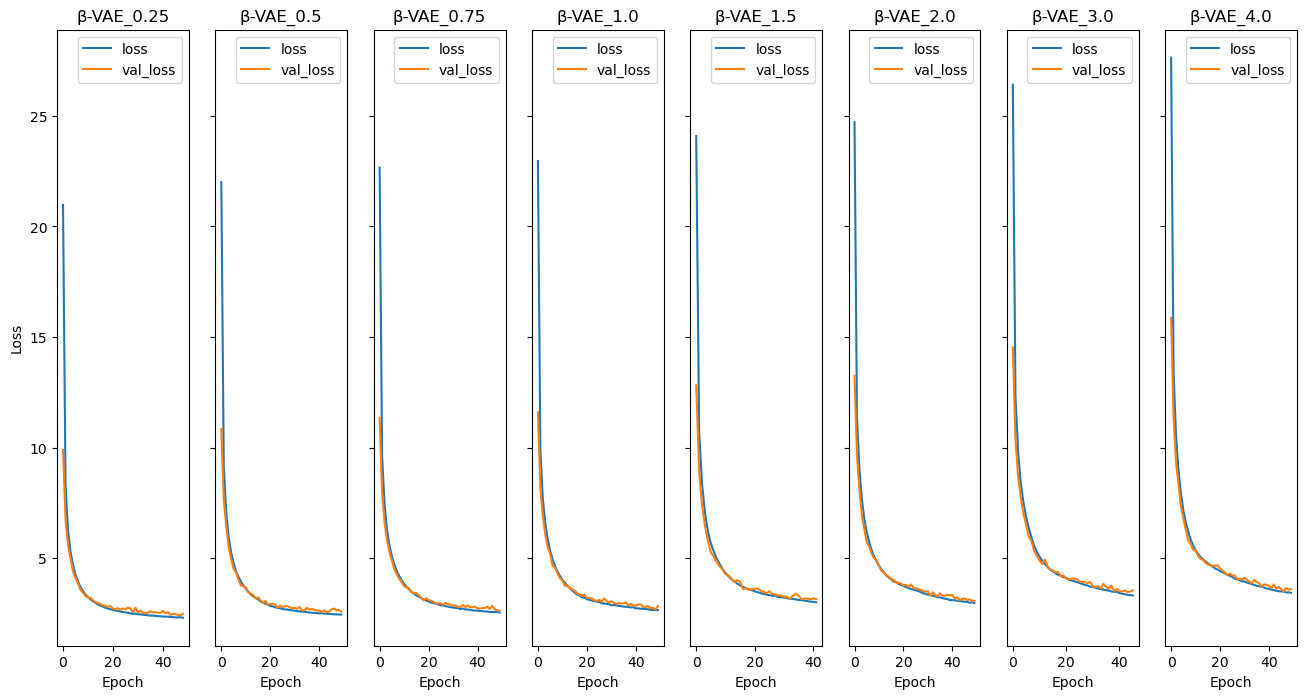

In [14]:
fig, axes = plt.subplots(ncols=len(betas), nrows=1, sharey=True)
for m, ax in zip(model_names, axes):
    plot_history(m, mnist_history_dir, ax)

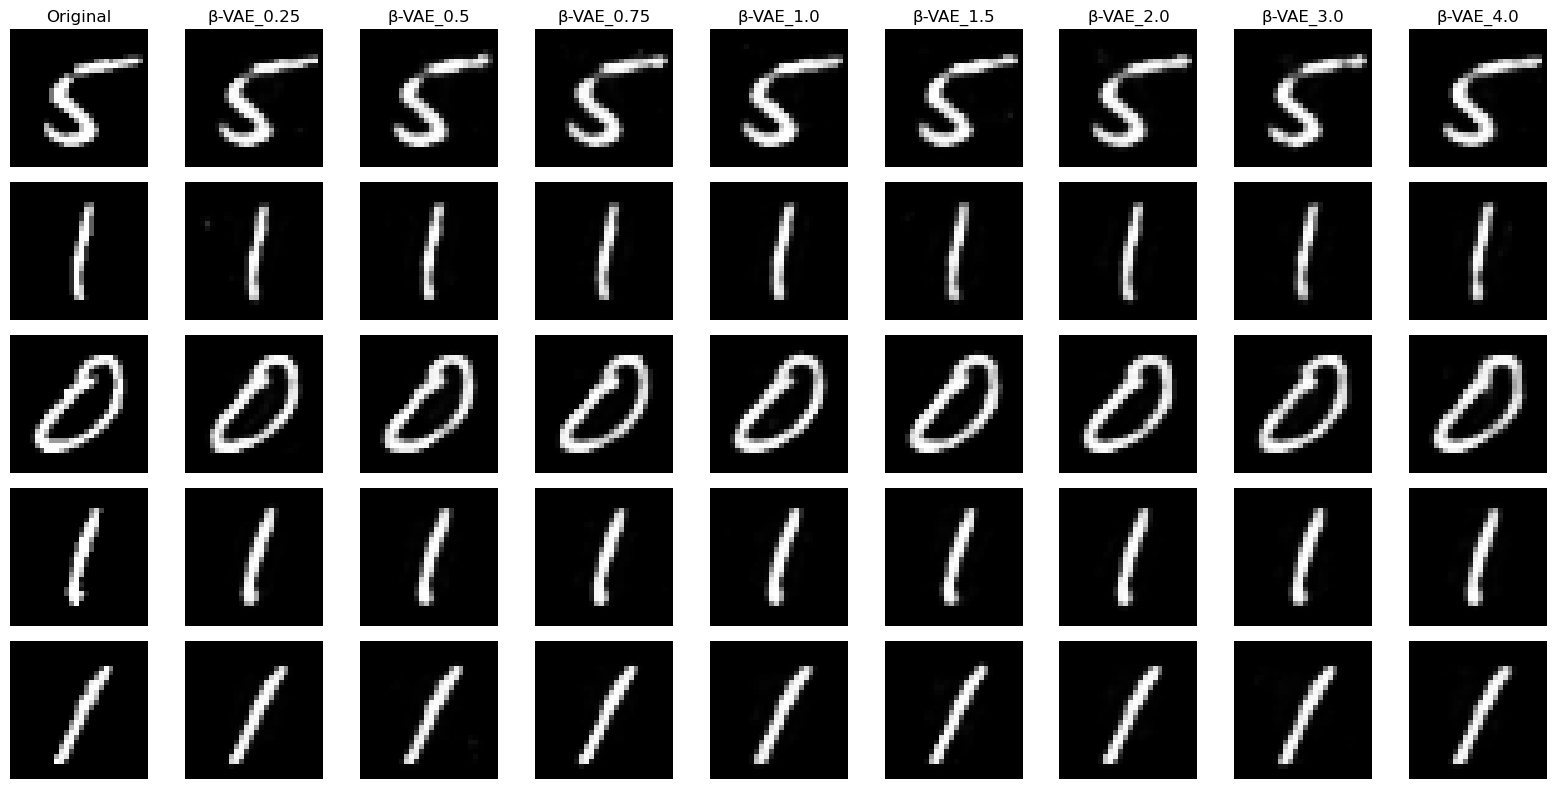

In [15]:
test_batch = next(iter(mnist_val_loader))[0][:5]
models = load_models(*model_names, kind='best', model_dir=mnist_weights_dir)
show_examples(test_batch, models)

In [16]:
fashion_mnist_train_data = torchvision.datasets.FashionMNIST(root='../datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
fashion_mnist_test_data = torchvision.datasets.FashionMNIST(root='../datasets', train=False, download=True, transform=torchvision.transforms.ToTensor())

fashion_mnist_train_loader = torch.utils.data.DataLoader(fashion_mnist_train_data, batch_size=64, shuffle=True, pin_memory=True)
fashion_mnist_val_loader = torch.utils.data.DataLoader(fashion_mnist_test_data, batch_size=64, shuffle=True, pin_memory=True)
fashion_mnist_weights_dir = 'weights/FashionMNIST'
fashion_mnist_history_dir = 'histories/FashionMNIST'

os.makedirs(fashion_mnist_weights_dir, exist_ok=True)
os.makedirs(fashion_mnist_history_dir, exist_ok=True)
fashion_mnist_shape = (1, 28, 28)

for b in betas:
    test_beta_vae(b, fashion_mnist_shape, fashion_mnist_train_loader, fashion_mnist_val_loader, fashion_mnist_weights_dir, fashion_mnist_history_dir)


Epoch 1: Train loss: 19.850135, Validation loss: 13.17566898803711
Epoch 2: Train loss: 11.588086, Validation loss: 10.645107746887208
Epoch 3: Train loss: 9.673815, Validation loss: 9.253444175720215
Epoch 4: Train loss: 8.629725, Validation loss: 8.346498142242432
Epoch 5: Train loss: 7.933573, Validation loss: 7.87483702545166
Epoch 6: Train loss: 7.434073, Validation loss: 7.294480415344238
Epoch 7: Train loss: 7.046811, Validation loss: 7.0179711227417
Epoch 8: Train loss: 6.751256, Validation loss: 6.768494902038574
Epoch 9: Train loss: 6.493966, Validation loss: 6.627815393066406
Epoch 10: Train loss: 6.311275, Validation loss: 6.405727264404297
Epoch 11: Train loss: 6.131153, Validation loss: 6.334084204864502
Epoch 12: Train loss: 5.993323, Validation loss: 6.175518671417237
Epoch 13: Train loss: 5.860089, Validation loss: 6.014853977966308
Epoch 14: Train loss: 5.772992, Validation loss: 6.020841592407226
Epoch 15: Train loss: 5.664360, Validation loss: 5.870202170562744
Epoc

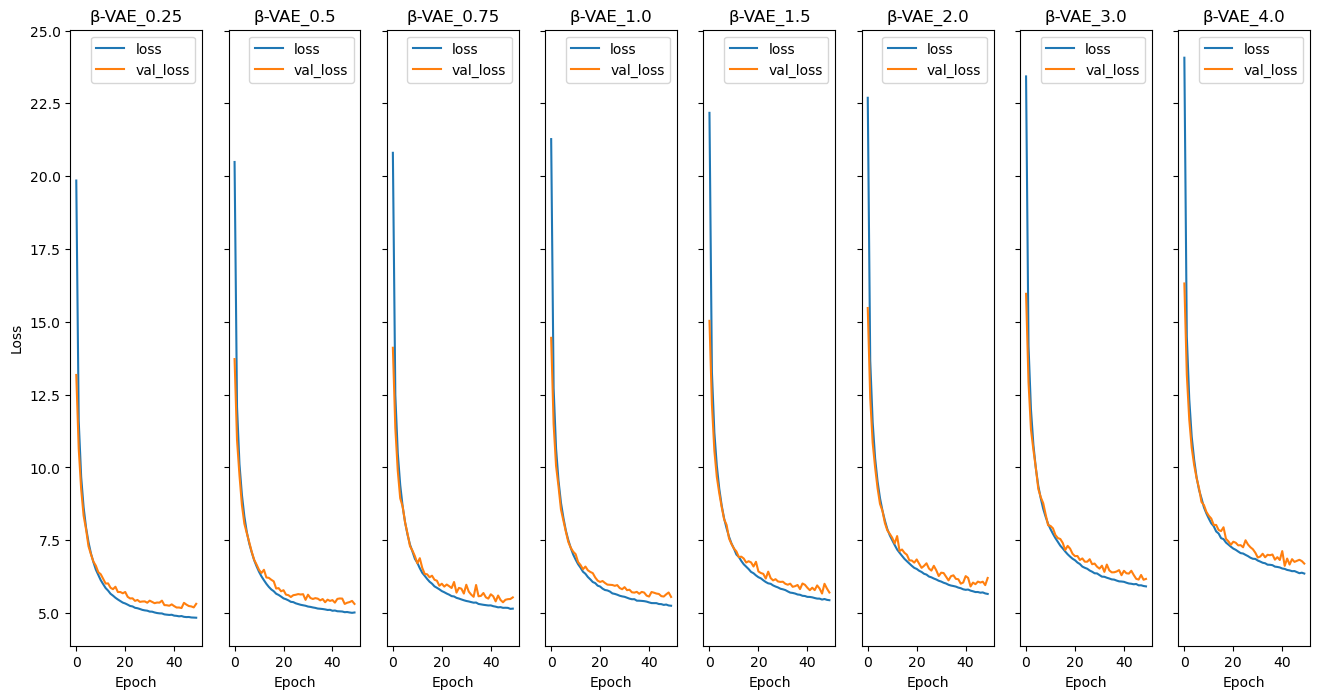

In [17]:
fig, axes = plt.subplots(ncols=len(betas), nrows=1, sharey=True)
for m, ax in zip(model_names, axes):
    plot_history(m, fashion_mnist_history_dir, ax)

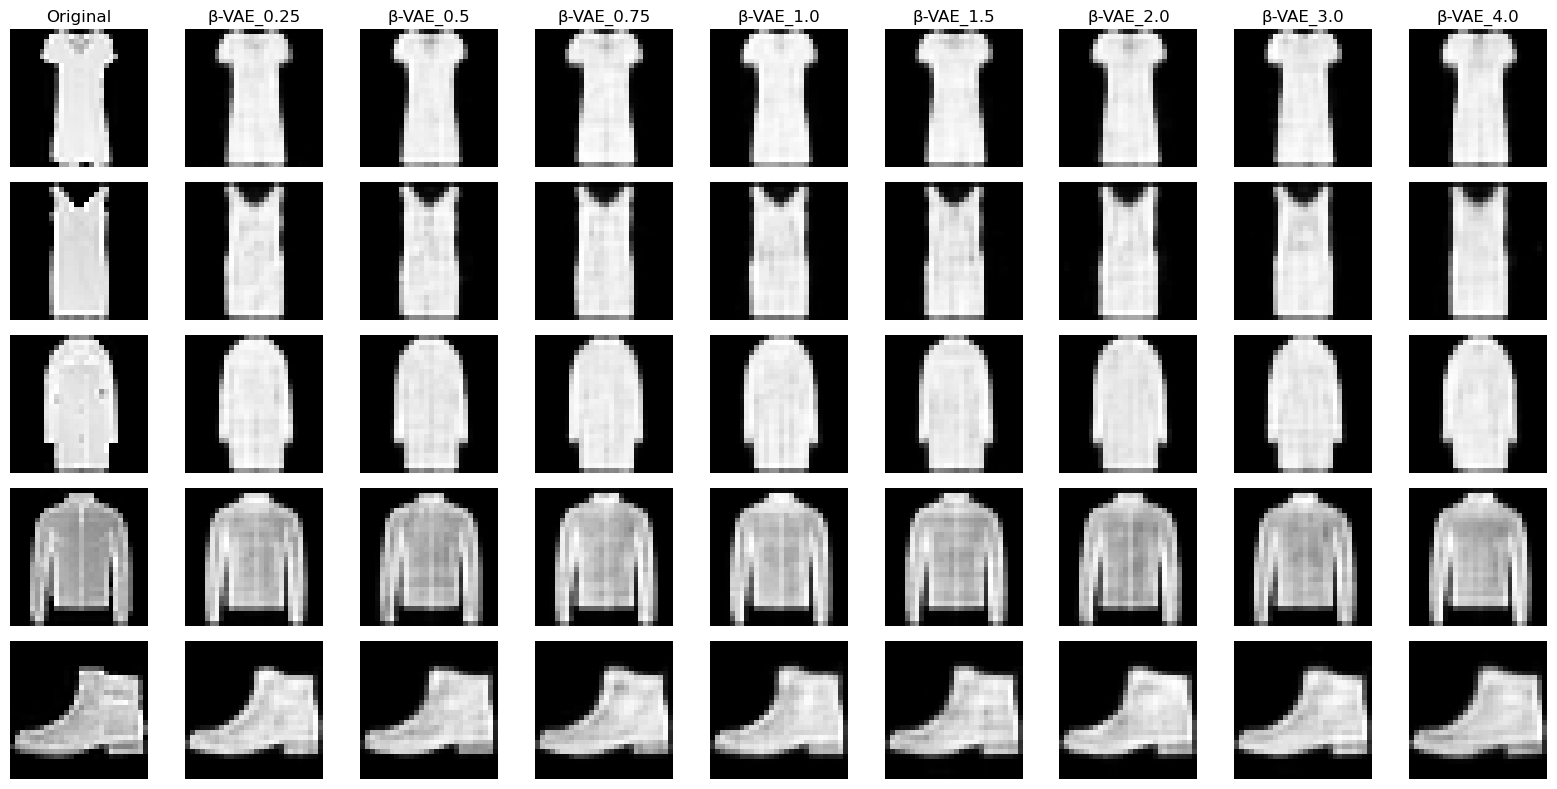

In [18]:
test_batch = next(iter(fashion_mnist_val_loader))[0][:5]
models = load_models(*model_names, kind='best', model_dir=fashion_mnist_weights_dir)
show_examples(test_batch, models)

In [19]:
cifar10_train_data = torchvision.datasets.CIFAR10(root='../datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
cifar10_test_data = torchvision.datasets.CIFAR10(root='../datasets', train=False, download=True, transform=torchvision.transforms.ToTensor())

cifar10_train_loader = torch.utils.data.DataLoader(cifar10_train_data, batch_size=64, shuffle=True, pin_memory=True)
cifar10_val_loader = torch.utils.data.DataLoader(cifar10_test_data, batch_size=64, shuffle=True, pin_memory=True)
cifar10_weights_dir = 'weights/CIFAR10'
cifar10_history_dir = 'histories/CIFAR10'

os.makedirs(cifar10_weights_dir, exist_ok=True)
os.makedirs(cifar10_history_dir, exist_ok=True)
cifar10_shape = (3, 32, 32)

for b in betas:
    test_beta_vae(b, cifar10_shape, cifar10_train_loader, cifar10_val_loader, cifar10_weights_dir, cifar10_history_dir)


Epoch 1: Train loss: 81.174340, Validation loss: 64.13826235351563
Epoch 2: Train loss: 56.550354, Validation loss: 53.47025040893555
Epoch 3: Train loss: 50.653611, Validation loss: 49.50564650878906
Epoch 4: Train loss: 48.217097, Validation loss: 47.086334173583985
Epoch 5: Train loss: 46.074423, Validation loss: 46.6147496887207
Epoch 6: Train loss: 44.434901, Validation loss: 45.10824655151367
Epoch 7: Train loss: 43.765345, Validation loss: 44.64209476928711
Epoch 8: Train loss: 43.528612, Validation loss: 44.589417248535156
Epoch 9: Train loss: 43.276338, Validation loss: 44.36754254150391
Epoch 10: Train loss: 43.087196, Validation loss: 43.68648266601563
Epoch 11: Train loss: 42.967966, Validation loss: 43.47829143676758
Epoch 12: Train loss: 42.772516, Validation loss: 43.37862861328125
Epoch 13: Train loss: 42.295409, Validation loss: 43.190902447509764
Epoch 14: Train loss: 42.039432, Validation loss: 43.05758515014649
Epoch 15: Train loss: 41.862862, Validation loss: 42.86

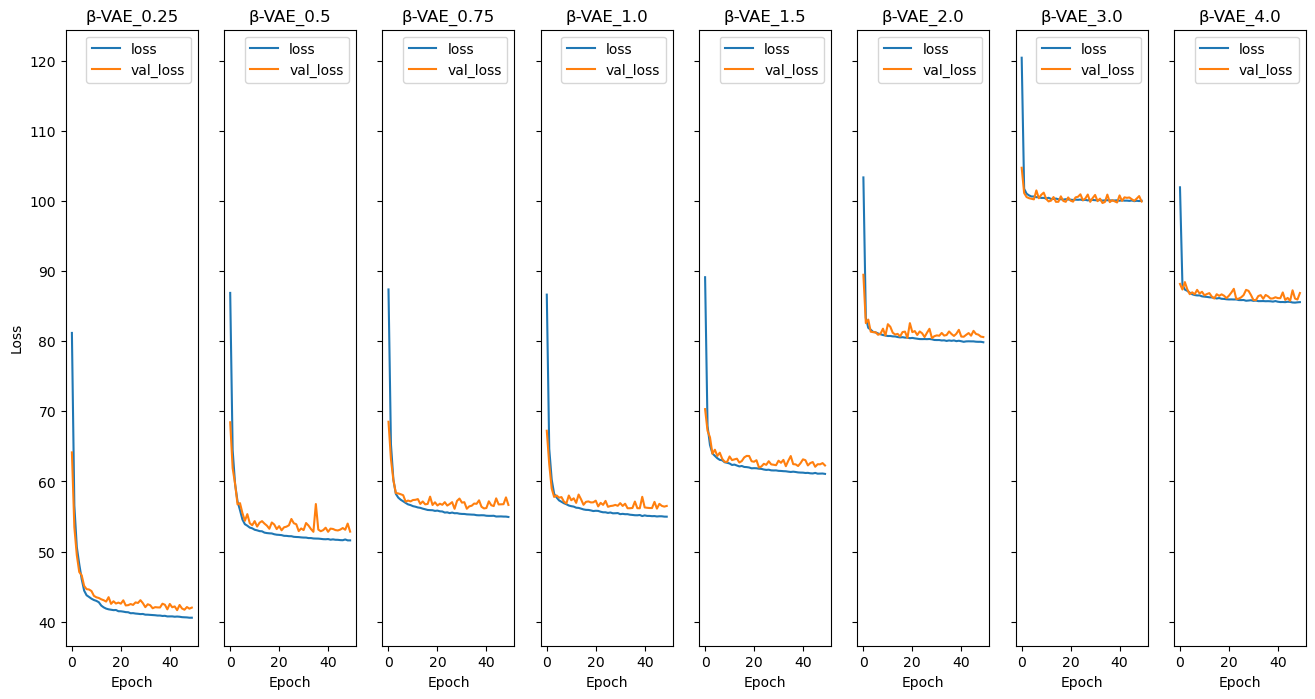

In [20]:
fig, axes = plt.subplots(ncols=len(betas), nrows=1, sharey=True)
for m, ax in zip(model_names, axes):
    plot_history(m, cifar10_history_dir, ax)

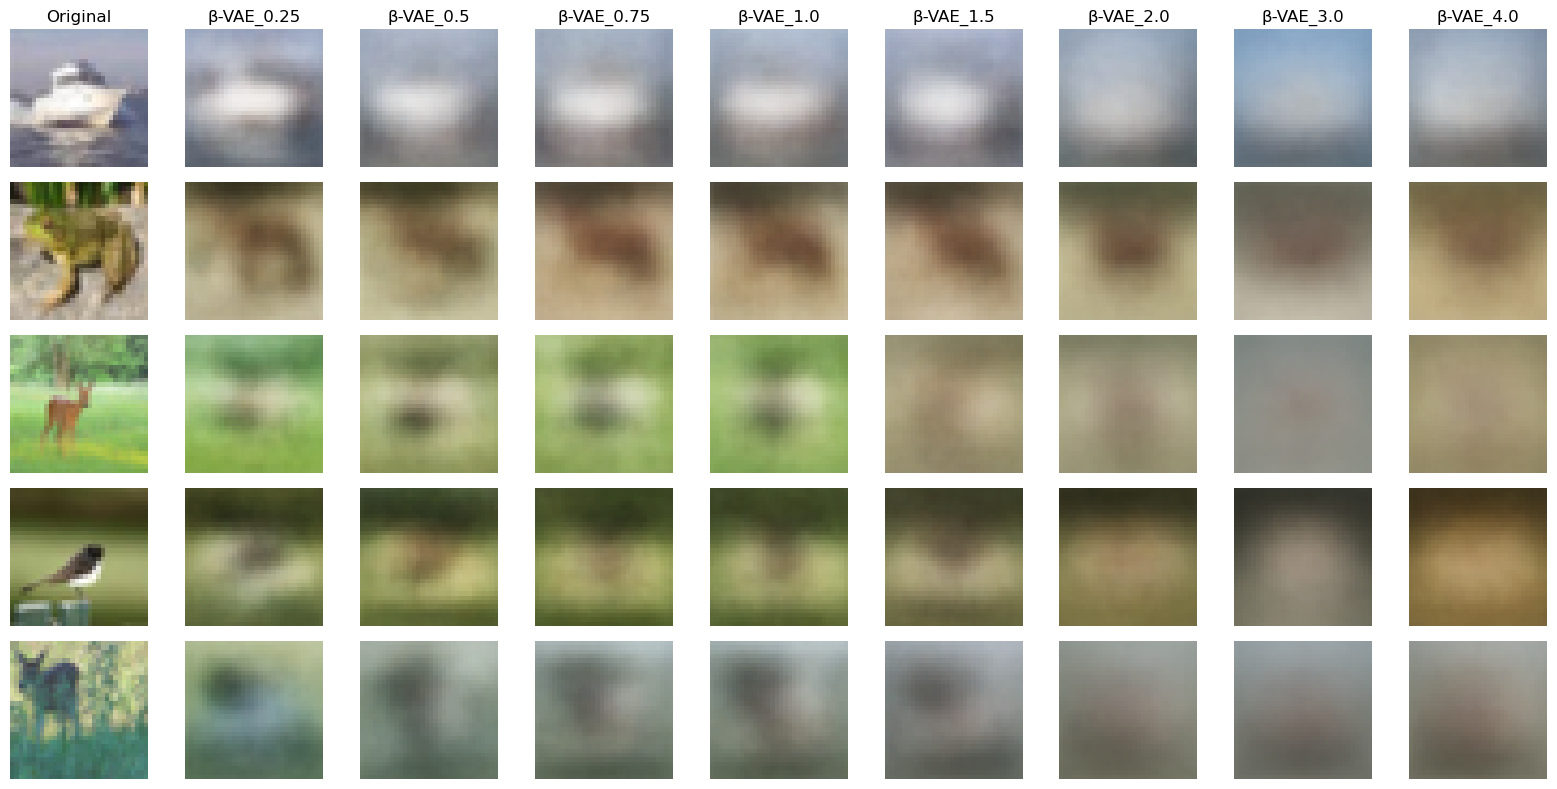

In [21]:
test_batch = next(iter(cifar10_val_loader))[0][:5]
models = load_models(*model_names, kind='best', model_dir=cifar10_weights_dir)
show_examples(test_batch, models)